In [ ]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_path = '/content/dogs-vs-cats.zip'
extract_path = '/content/dataset'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
# Step 6: Verify directory structure
!ls /content/dataset/train
!ls /content/dataset/test

In [ ]:
# Step 5: Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 6: Set up data augmentation and preprocessing
# Define paths (use train folder for both training and validation with a split)
train_dir = '/content/dataset/train'

# Data augmentation for training (to improve model robustness)
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0,1]
    rotation_range=40,           # Random rotation between -40 and 40 degrees
    width_shift_range=0.2,       # Random horizontal shift
    height_shift_range=0.2,      # Random vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Random horizontal flip
    fill_mode='nearest',         # Fill pixels with nearest value
    validation_split=0.2         # 20% of data for validation
)

# Only rescaling for validation (no augmentation)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load training data (80% of train folder)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),      # Resize images to 150x150
    batch_size=32,
    class_mode='binary',         # Binary classification (0=cat, 1=dog)
    subset='training'            # Use training subset
)

# Load validation data (20% of train folder)
validation_generator = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'          # Use validation subset
)

In [ ]:
# Step 7: Build the CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Fourth Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),                # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')  # Binary output (cat or dog)
])

In [ ]:
# Step 8: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Print model summary
model.summary()

In [ ]:
# Step 9: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

In [ ]:
# Step 10: Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


In [ ]:
# Step 11: Save the model
model.save('/content/cats_vs_dogs_model.h5')


In [ ]:
# Step 12: Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(30)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


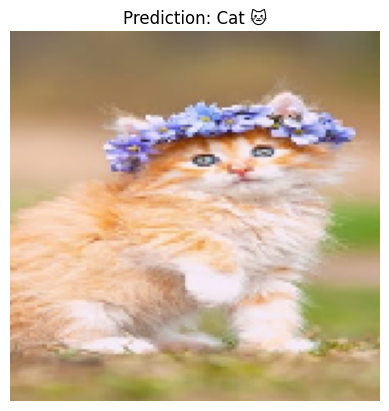

Cat 🐱


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

model = tf.keras.models.load_model('/content/cats_vs_dogs_model.h5')

def predict_image(image_path, model):
    # Load and preprocess image
    img = load_img(image_path, target_size=(150, 150))  # Resize to match model input
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img_array)

    # Show image with label
    plt.imshow(img)
    plt.axis('off')
    label = 'Dog 🐶' if prediction[0][0] > 0.5 else 'Cat 🐱'
    plt.title(f"Prediction: {label}")
    plt.show()

    return label

# Example usage (make sure 'model' is already loaded/trained):
print(predict_image('/content/c62e47ccce4e8e568c9c7e381032bde9.jpg', model))
